In [ ]:
# Solo en google colab
#Cambia el entorno de ejecución a TPU

In [2]:
# Solo en google colab
# Instalar tensorflow_addons
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 10.7 MB/s eta 0:00:00


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras #es una libreria
from tensorflow.keras import layers
import matplotlib as plt
import seaborn as sns
sns.set(style="darkgrid")

## Tensorflow

¿Cuál es valor de $w$ que minimiza el valor de la siguiente función siendo $x = [100, -5, 2]$?

$$x_0 + x_1w + x_2w^2$$

#### Solución
$w=5/4$

### Definición del modelo

In [13]:
# Coeficientes a optimizar
w = tf.Variable(0, name='w', dtype=tf.float32) #definido la variable
# Función a optimizar/minimizar
f = lambda: 2.*w**2. -5.*w + 100. #definido la función a minimizar

# Optimizador de tipo descenso de gradiente estocástico
optimizer = tf.optimizers.SGD(learning_rate=0.1) #algoritmo con los que voy a dar los saltos, SGD descenso del gradiente
#learning_rate no puede ser ni muy grande ni muy pequeño
# Iteramos 20 veces el optimizador
for i in range(20):
    optimizer.minimize(f,(w,))
    print("iterations: ", i, ",\f: ", f().numpy(), ",\tw: ", w.numpy())

iterations:  0 ,:  98.0 ,	w:  0.5
iterations:  1 ,:  97.28 ,	w:  0.8
iterations:  2 ,:  97.0208 ,	w:  0.98
iterations:  3 ,:  96.92749 ,	w:  1.088
iterations:  4 ,:  96.8939 ,	w:  1.1528001
iterations:  5 ,:  96.881805 ,	w:  1.1916801
iterations:  6 ,:  96.87745 ,	w:  1.215008
iterations:  7 ,:  96.875885 ,	w:  1.2290049
iterations:  8 ,:  96.87532 ,	w:  1.2374029
iterations:  9 ,:  96.875114 ,	w:  1.2424418
iterations:  10 ,:  96.87504 ,	w:  1.245465
iterations:  11 ,:  96.875015 ,	w:  1.247279
iterations:  12 ,:  96.87501 ,	w:  1.2483674
iterations:  13 ,:  96.875 ,	w:  1.2490205
iterations:  14 ,:  96.875 ,	w:  1.2494123
iterations:  15 ,:  96.875 ,	w:  1.2496474
iterations:  16 ,:  96.875 ,	w:  1.2497884
iterations:  17 ,:  96.875 ,	w:  1.249873
iterations:  18 ,:  96.875 ,	w:  1.2499238
iterations:  19 ,:  96.875 ,	w:  1.2499543


## Perceptrón simple: Compuertas AND, OR y XOR

In [14]:
# Entradas a la compuerta
X = np.array([[0.,0.],[0.,1.],[1.,0.],[1.,1.]], dtype=np.float32)

y_and = np.array([[0.],[0.],[0.],[1.]], dtype=np.float32)

y_or = np.array([[0.],[1.],[1.],[1.]], dtype=np.float32)

y_xor = np.array([[0.],[1.],[1.],[0.]], dtype=np.float32)

In [21]:
# Definimos los pesos y bias
W = tf.constant([[0.], [0.]], name='w', dtype=tf.float32)
b = tf.constant(0., name='b', dtype=tf.float32)

# Perceptrón simple (con función de activación sigmoide)
y_ = tf.nn.sigmoid(tf.matmul(X,W, name='mat_mul') + b, name='sigmoide')

# Resultado
print("Output", np.round(y_.numpy()).reshape(4,))

Output [0. 0. 0. 0.]


#### Probemos ahora optimizando con tensorflow

In [24]:
# Definimos los pesos, ahora son variables porque tenemos que optimizarlos
W = tf.Variable(tf.random.normal(shape=[2,1],stddev=1./np.sqrt(2)), name='w', dtype=tf.float32)
b = tf.Variable(tf.zeros(1), name='b', dtype=tf.float32)

#Definimos las métricas
cost = tf.metrics.Mean(name='cost')
accuracy = tf.metrics.BinaryAccuracy(name='accuracy')

#Definimos el optimizador (SGD)
optimizer = tf.optimizers.SGD(learning_rate=0.25)

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        # Se registran las funciones a optimizar
        y_ = tf.nn.sigmoid(tf.matmul(X,W, name='mat_mul') + b, name='sigmoide')
        # Usar binary_crossentropy
        loss = tf.losses.binary_crossentropy(y,y_)
    #Obtenemos los gradientes
    gradients = tape.gradient(loss, (W, b))
    #Optimizamos (1 paso)
    optimizer.apply_gradients(zip(gradients, (W, b)))

    #Calculamos las métricas
    cost(loss)
    accuracy(y, y_)

Probemos el funcionamiento de nuetro perceptron simple con las tres compuertas
#### AND

In [25]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_and)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

Epoch 1, Cost: 0.7306404709815979, Accuracy: 50.0
Epoch 2, Cost: 0.6183978915214539, Accuracy: 75.0
Epoch 3, Cost: 0.5641741752624512, Accuracy: 100.0
Epoch 4, Cost: 0.5331952571868896, Accuracy: 75.0
Epoch 5, Cost: 0.5114759206771851, Accuracy: 75.0
Epoch 6, Cost: 0.4938541054725647, Accuracy: 75.0
Epoch 7, Cost: 0.47838062047958374, Accuracy: 75.0
Epoch 8, Cost: 0.46427249908447266, Accuracy: 75.0
Epoch 9, Cost: 0.4511842131614685, Accuracy: 75.0
Epoch 10, Cost: 0.43894070386886597, Accuracy: 75.0
Epoch 11, Cost: 0.4274366796016693, Accuracy: 75.0
Epoch 12, Cost: 0.41659748554229736, Accuracy: 75.0
Epoch 13, Cost: 0.40636366605758667, Accuracy: 75.0
Epoch 14, Cost: 0.396684467792511, Accuracy: 75.0
Epoch 15, Cost: 0.38751521706581116, Accuracy: 100.0
Epoch 16, Cost: 0.3788159191608429, Accuracy: 100.0
Epoch 17, Cost: 0.3705504536628723, Accuracy: 100.0
Epoch 18, Cost: 0.3626862168312073, Accuracy: 100.0
Epoch 19, Cost: 0.3551936447620392, Accuracy: 100.0
Epoch 20, Cost: 0.34804576635

#### OR
Ejecutar primero el bloque donde se definen los pesos para reinicializar los valores

In [26]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_or)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

Epoch 1, Cost: 0.8137547969818115, Accuracy: 50.0
Epoch 2, Cost: 0.5090466141700745, Accuracy: 50.0
Epoch 3, Cost: 0.3733975291252136, Accuracy: 100.0
Epoch 4, Cost: 0.30594831705093384, Accuracy: 100.0
Epoch 5, Cost: 0.2682705521583557, Accuracy: 100.0
Epoch 6, Cost: 0.24512748420238495, Accuracy: 100.0
Epoch 7, Cost: 0.22974658012390137, Accuracy: 100.0
Epoch 8, Cost: 0.2188078910112381, Accuracy: 100.0
Epoch 9, Cost: 0.210554301738739, Accuracy: 100.0
Epoch 10, Cost: 0.20399850606918335, Accuracy: 100.0
Epoch 11, Cost: 0.19855885207653046, Accuracy: 100.0
Epoch 12, Cost: 0.19387929141521454, Accuracy: 100.0
Epoch 13, Cost: 0.18973487615585327, Accuracy: 100.0
Epoch 14, Cost: 0.18597976863384247, Accuracy: 100.0
Epoch 15, Cost: 0.182516947388649, Accuracy: 100.0
Epoch 16, Cost: 0.17928071320056915, Accuracy: 100.0
Epoch 17, Cost: 0.17622552812099457, Accuracy: 100.0
Epoch 18, Cost: 0.17331932485103607, Accuracy: 100.0
Epoch 19, Cost: 0.17053893208503723, Accuracy: 100.0
Epoch 20, Cos

#### XOR
Ejecutar primero el bloque donde se definen los pesos para reinicializar los valores

In [27]:
EPOCHS = 20

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_xor)

    template = 'Epoch {}, Cost: {}, Accuracy: {}'
    print(template.format(epoch+1,
                        cost.result(),
                        accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(X, W, name='matmul') + b, name="sigmoid")
print("Output", np.round(y_.numpy()).reshape(4,))

Epoch 1, Cost: 1.3225243091583252, Accuracy: 75.0
Epoch 2, Cost: 1.1698497533798218, Accuracy: 75.0
Epoch 3, Cost: 1.0545169115066528, Accuracy: 75.0
Epoch 4, Cost: 0.972996175289154, Accuracy: 75.0
Epoch 5, Cost: 0.9183843731880188, Accuracy: 75.0
Epoch 6, Cost: 0.882753312587738, Accuracy: 75.0
Epoch 7, Cost: 0.8592578172683716, Accuracy: 75.0
Epoch 8, Cost: 0.8429831862449646, Accuracy: 25.0
Epoch 9, Cost: 0.8308205604553223, Accuracy: 25.0
Epoch 10, Cost: 0.820971667766571, Accuracy: 25.0
Epoch 11, Cost: 0.8124614953994751, Accuracy: 25.0
Epoch 12, Cost: 0.8047841787338257, Accuracy: 25.0
Epoch 13, Cost: 0.797684907913208, Accuracy: 25.0
Epoch 14, Cost: 0.7910361289978027, Accuracy: 25.0
Epoch 15, Cost: 0.7847726941108704, Accuracy: 25.0
Epoch 16, Cost: 0.7788592576980591, Accuracy: 25.0
Epoch 17, Cost: 0.7732739448547363, Accuracy: 25.0
Epoch 18, Cost: 0.7680010795593262, Accuracy: 25.0
Epoch 19, Cost: 0.7630276083946228, Accuracy: 25.0
Epoch 20, Cost: 0.7583413124084473, Accuracy

#### ¿Qué ha sucedido con la compuerta XOR?

## Perceptrón Multicapa: Compuerta XOR
Crear un perceptron multicapa con topología 2-2-1 (2 entradas, 2 ocultas y una salida)

In [28]:
# Pesos del perceptrón multicapa
Wh = tf.Variable(tf.random.normal(shape=[2,2],stddev=1./np.sqrt(2)), name='wh', dtype=tf.float32)
bh = tf.Variable(tf.zeros(2), name='bh', dtype=tf.float32)

Wo = tf.Variable(tf.random.normal(shape=[2,1],stddev=1./np.sqrt(2)), name='wh', dtype=tf.float32)
bo = tf.Variable(tf.zeros(1), name='bh', dtype=tf.float32)

#Definimos las métricas
cost = tf.metrics.Mean(name='cost')
accuracy = tf.metrics.BinaryAccuracy(name='accuracy')

#Definimos el optimizador (SGD)
optimizer = tf.optimizers.SGD(learning_rate=0.42)

@tf.function
def train_step(X, y):
    with tf.GradientTape() as tape:
        # Se registran las funciones a optimizar
        # Perceptrón multicapa
        #Capa oculta, usa la tangente hiberbolica porque es flexible que me permite usar variabilidad
        a_h = tf.nn.tanh(tf.matmul(X, Wh) + bh, name='a_h')
        #Capa de salida, sigmoide porque es de clasificacion binario
        y_ = tf.nn.sigmoid(tf.matmul(a_h, Wo) + bo, name='y_')
        # Usar binary_crossentropy
        loss = tf.losses.binary_crossentropy(y,y_)
    #Obtenemos los gradientes
    gradients = tape.gradient(loss, (Wh, bh, Wo, bo))
    #Optimizamos (1 paso)
    optimizer.apply_gradients(zip(gradients, (Wh, bh, Wo, bo)))

    #Calculamos las métricas
    cost(loss)
    accuracy(y,y_)

Ejecuta varias veces junto al anterior, no encuentra siempre la solución

In [29]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    cost.reset_states()
    accuracy.reset_states()

    train_step(X, y_xor)
    if epoch%10==0:
        template = 'Epoch {}, Cost: {}, Accuracy: {}'
        print(template.format(epoch+1,
                            cost.result(),
                            accuracy.result()*100))

y_ = tf.nn.sigmoid(tf.matmul(tf.nn.tanh(tf.matmul(X, Wh) + bh, name='a_h'), Wo) + bo, name='y_')
print("Output", np.round(y_.numpy()).reshape(4,))

Epoch 1, Cost: 0.7496120929718018, Accuracy: 50.0
Epoch 11, Cost: 0.6840208768844604, Accuracy: 50.0
Epoch 21, Cost: 0.6359075307846069, Accuracy: 75.0
Epoch 31, Cost: 0.5373520851135254, Accuracy: 75.0
Epoch 41, Cost: 0.45352205634117126, Accuracy: 75.0
Epoch 51, Cost: 0.40923011302948, Accuracy: 50.0
Epoch 61, Cost: 0.38797223567962646, Accuracy: 50.0
Epoch 71, Cost: 0.37663620710372925, Accuracy: 50.0
Epoch 81, Cost: 0.36985790729522705, Accuracy: 50.0
Epoch 91, Cost: 0.36543214321136475, Accuracy: 50.0
Output [0. 0. 1. 1.]


## Problema regresión: Diabetes
## TENEMOS QUE HACERLO NOSOTRAS

In [30]:
import io
import requests


# https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# age, sex, body mass index, average blood pressure, and six blood serum measurements
url="https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
c=requests.get(url).content
diabetes=pd.read_csv(io.StringIO(c.decode('utf-8')), sep='\t')

In [31]:
diabetes.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [35]:
from sklearn.model_selection import train_test_split

diabetes['SEX'] -= 1
X_train, X_test, y_train, y_test = train_test_split(diabetes.drop('Y', axis=1).values,
                                                    #Aniadimos una dimension para que sea un vector columna
                                                    diabetes['Y'].values[..., np.newaxis],
                                                    test_size=0.2, random_state=0)

In [33]:
from sklearn.preprocessing import StandardScaler

class StandardScalerSelection(StandardScaler):
    '''Solo funciona con pandas '''

    def __init__(self, copy=True, with_mean=True, with_std=True, skip_cols=None):
        self.skip_cols = np.array(skip_cols).flatten().tolist()
        super().__init__(copy, with_mean, with_std)

    def fit(self, X, y=None):
        return super().fit(np.delete(X, self.skip_cols, axis=1))

    def transform(self, X):
        X_scl = super().transform(np.delete(X, self.skip_cols, axis=1))
        # Restar uno por cada indice anterior para que asi se inserte en su posición
        idx = np.array(skip_cols)-np.arange(len(skip_cols))
        return np.insert(X_scl, idx, X[:,self.skip_cols], axis=1)

In [34]:
skip_cols = sorted([diabetes.columns.get_loc(c) for c in ['SEX'] if c in diabetes])
scaler = StandardScalerSelection(skip_cols=skip_cols)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.astype(np.float64)
y_test = y_test.astype(np.float64)

TypeError: ignored

### TensorFlow

In [ ]:
#TODO
# Pesos del perceptrón multicapa
Wh1 = #TODO
bh1 = #TODO

Wh2 = #TODO
bh2 = #TODO

Wo = #TODO
bo = #TODO

#Definimos las funciones de coste
train_cost = #TODO
train_r2 = #TODO
test_cost = #TODO
test_r2 = #TODO


#Definimos el optimizador (Adam)
optimizer = #TODO

@tf.function
def train_step(X, y):
    #TODO

# Función para obtener la precision y coste en test
@tf.function
def test(X, y):
    # Perceptrón multicapa
    #TODO
    # Funcion de perdida
    #TODO
    #Calculamos las métricas
    #TODO

In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_r2.reset_states()
    test_cost.reset_states()
    test_r2.reset_states()

    train_step(X_train, y_train)
    test(X_test, y_test)
    if epoch%10==0:
        template = 'Epoch {:}, Train cost: {:.4f}, Train R2: {:.4f}, Test cost: {:.4f}, Test R2: {:.4f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_r2.result(),
                            train_cost.result(),
                            test_r2.result()))

## Keras

In [36]:
#Modelo
#64 es el número de neuronas en la primera capa oculta, input_shape es la cantidad de variables que van a entrar, es decir, el número de columnas que tenga X_train
model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.tanh, input_shape=[X_train.shape[1]], name='h1'),
    layers.Dense(32, activation=tf.nn.tanh, name='h2'),
    layers.Dense(1, name='o'),
  ])
#loss es la funcion de perdida,
model.compile(loss = 'mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=['mean_absolPrecisionte_rror','mean_squared_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 64)                704       
                                                                 
 h2 (Dense)                  (None, 32)                2080      
                                                                 
 o (Dense)                   (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
9/9 [==============================] - 0s 23ms/step - loss: 5889.2832 - mean_absolute_error: 65.8391 - mean_squared_error: 5889.2832 - val_loss: 7125.3281 - val_mean_absolute_error: 72.8104 - val_mean_squared_error: 7125.3281
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 5885.7241 - mean_absolute_error: 65.7584 - mean_squared_error: 5885.7241 - val_loss: 7128.2163 - val_mean_absolute_error: 72.7745 - val_mean_squared_error: 7128.2163
Epoch 3/100
9/9 [==============================] - 0s 23ms/step - loss: 5892.6465 - mean_absolute_error: 65.9631 - mean_squared_error: 5892.6465 - val_loss: 7112.1851 - val_mean_absolute_error: 73.0374 - val_mean_squared_error: 7112.1851
Epoch 4/100
9/9 [==============================] - 0s 13ms/step - loss: 5887.0732 - mean_absolute_error: 65.9308 - mean_squared_error: 5887.0732 - val_loss: 7120.9443 - val_mean_absolute_error: 72.8692 - val_mean_squared_error: 7120.9443
Epoch 5/100
9/9 [==============================]

In [39]:
# Obtener la precisión del modelo, evaluamos el modelo
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 5129.5381 - mean_absolute_error: 59.3336 - mean_squared_error: 5129.5381


[5129.5380859375, 59.33356857299805, 5129.5380859375]

Mean Absolute Error Train: 67.51
Mean Absolute Error Test: 59.33


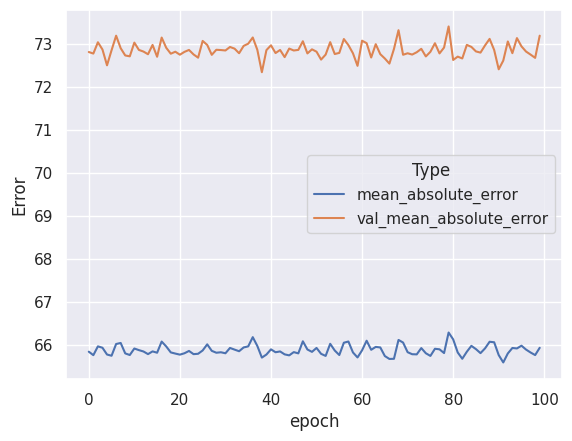

In [40]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Error',
               value_vars=['mean_absolute_error','val_mean_absolute_error'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Error', hue='Type', data=df)


print("Mean Absolute Error Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Mean Absolute Error Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

### Problema de clasificación: Breast Cancer
# Es como la deteccion de fraude, y en la ultima capa vamos a necesitar una funcion de activacion sigmoide

In [ ]:
import io
import requests

# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
c=requests.get(url).content
cancer=pd.read_csv(io.StringIO(c.decode('utf-8')), header=None, index_col=0)

In [ ]:
cancer.head()

In [ ]:
from sklearn.model_selection import train_test_split

cancer[1] = list(map(float, cancer[1].values=='M'))
X_train, X_test, y_train, y_test = train_test_split(cancer.drop(1, axis=1).values,
                                                    #Aniadimos una dimension para que sea un vector columna
                                                    cancer[1].values[..., np.newaxis],
                                                    test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### TensorFlow
Utilizar en este caso la métrica `AUC`

Para la función de perdida, utilizar `binary_crossentropy` al ser un problema binario

In [ ]:
#TODO
# Pesos del perceptrón multicapa
#TODO

#Definimos las métricas
train_cost = #TODO
train_auc = #TODO
test_cost = #TODO
test_auc = #TODO


#TODO...


In [ ]:
EPOCHS = 100

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_auc.reset_states()
    test_cost.reset_states()
    test_auc.reset_states()

    train_step(X_train, y_train)
    test(X_test, y_test)
    if epoch%10==0:
        template = 'Epoch {:}, Train Cost: {:.4f}, Train AUC: {:.2f}, Test Cost: {:.4f}, Test AUC: {:.2f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_auc.result()*100,
                            test_cost.result(),
                            test_auc.result()*100))

### Keras

In [ ]:
#TODO

In [ ]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['binary_accuracy','val_binary_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])

## Problema de clasificación multiclase: MNIST

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
X_train = train_images / 255.0
X_test = test_images / 255.0

In [ ]:
# OneHotEncoding para AUC
from sklearn.preprocessing import LabelBinarizer

le = LabelBinarizer().fit(train_labels)
y_train_label = le.transform(train_labels)
y_test_label = le.transform(test_labels)

In [ ]:
y_train = train_labels[..., np.newaxis]
y_test = test_labels[..., np.newaxis]

### Tensorflow

`sparse_categorical_crossentropy` funciona mejor en problemas donde las clases son mutuamente excluyentes, es decir, solo hay una clase positiva en cada tupla. `categorical_crossentropy` permite trabajar con problemas donde más de una clase puede ser positiva.

In [ ]:
#TODO

In [ ]:
EPOCHS = 10

for epoch in range(EPOCHS):
    # Reset the metrics at the start of the next epoch
    train_cost.reset_states()
    train_auc.reset_states()
    test_cost.reset_states()
    test_auc.reset_states()

    train_step(X_train, y_train, y_train_label)
    test(X_test, y_test, y_test_label)
    if epoch%1==0:
        template = 'Epoch {:}, Train Cost: {:.4f}, Train AUC: {:.2f}, Test Cost: {:.4f}, Test AUC: {:.2f}'
        print(template.format(epoch+1,
                            train_cost.result(),
                            train_auc.result()*100,
                            test_cost.result(),
                            test_auc.result()*100))

### Keras
Probar a crear el modelo con y sin dropout y batch normalization para comparar los resultados de validación

In [ ]:
#TODO

In [ ]:
hist = pd.DataFrame(history.history)
# Incluye la epoca para cada error
hist['epoch'] = history.epoch

# Colpasa los errores 'mean_absolute_error','val_mean_absolute_error' en una sola columna para sns
df = hist.melt(id_vars='epoch', var_name='Type', value_name='Accuracy',
               value_vars=['accuracy','val_accuracy'])
# Plot the responses for different events and regions
_ = sns.lineplot(x='epoch', y='Accuracy', hue='Type', data=df)

print("Accuracy Train: %.2f" % model.evaluate(X_train, y_train, verbose=0)[1])
print("Accuracy Test: %.2f" % model.evaluate(X_test, y_test, verbose=0)[1])